

---

# **1. Data 전처리**

---



In [1]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 1) resizing

In [7]:
import os
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.*")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [8]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

import os
image_dir_path = os.getenv("HOME") + "/rock_scissor_paper/rock"
print("image directory path : ", image_dir_path)
images=glob.glob(image_dir_path + "/*.*")  
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size =(28,28)
for img in images:
  old_img = Image.open(img)
  new_img = old_img.resize(target_size,Image.ANTIALIAS)
  new_img.save(img,"JPEG")
 
print("resizing rock image done!")

image directory path :  /home/aiffel/rock_scissor_paper/rock
resizing rock image done!


In [9]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
import os
image_dir_path = os.getenv("HOME") + "/rock_scissor_paper/paper"
print("image directory path : ", image_dir_path)
images=glob.glob(image_dir_path + "/*.*")  
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size =(28,28)
for img in images:
  old_img = Image.open(img)
  new_img = old_img.resize(target_size,Image.ANTIALIAS)
  new_img.save(img,"JPEG")
 
print("resizing scissor image done!")

image directory path :  /home/aiffel/rock_scissor_paper/paper
resizing scissor image done!


## 2) load data

In [32]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.*'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.*'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.*'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터(x)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/rock_scissor_paper"
(x, y)=load_data(image_dir_path)
x = x/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x shape: {}".format(x.shape))
print("y shape: {}".format(y.shape))

데이터(x)의 이미지 개수는 3300 입니다.
x shape: (3300, 28, 28, 3)
y shape: (3300,)


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)
x_test.shape

(990, 28, 28, 3)

라벨:  1


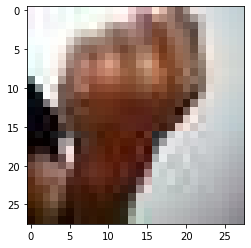

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_train[50])
print('라벨: ', y_train[50])



---
# **2. 모델**
---




In [40]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

---
# 3.  Compile


---



In [41]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
73/73 [==============================] - 4s 51ms/step - loss: 1.2187 - accuracy: 0.3242
Epoch 2/10
73/73 [==============================] - 0s 2ms/step - loss: 1.0703 - accuracy: 0.4355
Epoch 3/10
73/73 [==============================] - 0s 2ms/step - loss: 1.0233 - accuracy: 0.4922
Epoch 4/10
73/73 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.5732
Epoch 5/10
73/73 [==============================] - 0s 2ms/step - loss: 0.8356 - accuracy: 0.6411
Epoch 6/10
73/73 [==============================] - 0s 2ms/step - loss: 0.7458 - accuracy: 0.6797
Epoch 7/10
73/73 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.7364
Epoch 8/10
73/73 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.7615
Epoch 9/10
73/73 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.7801
Epoch 10/10
73/73 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.8056


In [43]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

31/31 - 2s - loss: 0.5386 - accuracy: 0.8081
test_loss: 0.5386146903038025 
test_accuracy: 0.808080792427063


---
# 4. Result
---

In [47]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=800  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [3.2300740e-03 2.3038859e-02 9.7373009e-01 1.7091708e-08 9.6213824e-08
 3.8918837e-09 3.8731727e-08 6.8461668e-07 1.3212235e-08 1.5208663e-07]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  2




---
# 5. 회고
---

이번 프로젝트에서 어려웠던 점,

프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점.

루브릭 평가 지표를 맞추기 위해 시도한 것들.

만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정.

자기 다짐

---
처음엔 데이터 300개로만 해야해서 너무 표본이 작은 것이 아닌가 싶었고, 랜덤으로 섞어서 하고 싶었는데 이걸 어떻게 했었나 잊어서 당황했다. 그러나 다음 수업차시를 진행하면서 다시 감을 잡았고 300개가 아닌 최대한의 데이터로 모델을 돌리고 랜덤으로 데이터를 섞는 train_test_split을 다시 상기하며 모델을 짜니 훨씬 수월했다. 덕분에 accuracy도 80프로를 넘겼다.처음엔 굉장히 막막했는데 하다보니 별거 아니란 생각도 들었고 차근차근 하나씩 뽀개가는 기분으로 하다보면 될거란 자신감도 얻었다. 